In [1]:
import requests
import zipfile
import os
import pandas as pd

# List of URLs to download
urls = [
    "https://excelbianalytics.com/wp/wp-content/uploads/2017/07/1000000%20Sales%20Records.zip",
    "https://excelbianalytics.com/wp/wp-content/uploads/2017/07/1500000%20Sales%20Records.zip"
]

# Corresponding file names for the downloaded files
file_names = [
    "1000000_Sales_Records.zip",
    "1500000_Sales_Records.zip"
]

# Directory where the files will be unzipped
unzip_dir = "unzipped_files"

# Create a directory to unzip files if it doesn't exist
os.makedirs(unzip_dir, exist_ok=True)

# Custom headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Loop through the URLs and download each file
for url, file_name in zip(urls, file_names):
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        # Save the zip file
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"File downloaded successfully as {file_name}")

        # Check if the downloaded file is a valid zip file
        if zipfile.is_zipfile(file_name):
            # Unzip the file and list its contents
            with zipfile.ZipFile(file_name, 'r') as zip_ref:
                # List contents of the zip
                zip_contents = zip_ref.namelist()
                if zip_contents:
                    print(f"Contents of {file_name}: {zip_contents}")
                    # Extract all files
                    zip_ref.extractall(unzip_dir)
                    print(f"File {file_name} unzipped to {unzip_dir}")
                else:
                    print(f"{file_name} is empty.")
        else:
            print(f"Downloaded file {file_name} is not a valid zip file.")
    else:
        print(f"Failed to download {file_name}. Status code: {response.status_code}")

# Paths to the CSV files
csv_1_0m_path = os.path.join(unzip_dir, "1000000 Sales Records.csv")
csv_1_5m_path = os.path.join(unzip_dir, "1500000 Sales Records.csv")

# Check if the CSVs exist and read them into DataFrames
if os.path.exists(csv_1_0m_path):
    df_1_0m = pd.read_csv(csv_1_0m_path)
    print(f"Loaded df_1.0m with shape: {df_1_0m.shape}")
else:
    print(f"{csv_1_0m_path} not found.")

if os.path.exists(csv_1_5m_path):
    df_1_5m = pd.read_csv(csv_1_5m_path)
    print(f"Loaded df_1.5m with shape: {df_1_5m.shape}")
else:
    print(f"{csv_1_5m_path} not found.")


File downloaded successfully as 1000000_Sales_Records.zip
Contents of 1000000_Sales_Records.zip: ['1000000 Sales Records.csv']
File 1000000_Sales_Records.zip unzipped to unzipped_files
File downloaded successfully as 1500000_Sales_Records.zip
Contents of 1500000_Sales_Records.zip: ['1500000 Sales Records.csv']
File 1500000_Sales_Records.zip unzipped to unzipped_files
Loaded df_1.0m with shape: (1000000, 14)
Loaded df_1.5m with shape: (1500000, 14)


In [ ]:
df_1_0m.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

# Dataframe Structure

### Summary of Findings

#### 1. Shape
- **df_1_0m** has **1,000,000** rows and **14** columns.
- **df_1_5m** has **1,500,000** rows and **14** columns.

#### 2. Data Types
- Both DataFrames have the same column names and data types:
  - **Object types** for categorical columns: `Region`, `Country`, `Item Type`, `Sales Channel`, `Order Priority`, `Order Date`, and `Ship Date`.
  - **Integer type** for `Order ID` and `Units Sold`.
  - **Float type** for `Unit Price`, `Unit Cost`, `Total Revenue`, `Total Cost`, and `Total Profit`.

This consistency in data types suggests that the columns are structured similarly, making it easier to perform operations that involve both DataFrames.

#### 3. Null Values
- Both DataFrames have **0 null values** in all columns, indicating complete data. This is excellent for analysis, as there will be no need to handle missing values.

### Similarities
1. **Same Structure**: Both DataFrames have the same columns, which means they can be easily combined or compared.
2. **No Missing Data**: Both DataFrames contain complete records, allowing for reliable analysis without the need for imputation or handling of missing values.

### Differences
1. **Size**: `df_1_5m` has **50% more records** than `df_1_0m`, which could affect aggregate calculations such as total revenue and profit. This might indicate that `df_1_5m` covers a more extensive time period or additional sales data.
  

In [ ]:
# Check the shape of each DataFrame
print("Shape of df_1_0m:", df_1_0m.shape)
print("Shape of df_1_5m:", df_1_5m.shape)

# Check data types
print("\nData Types in df_1_0m:\n", df_1_0m.dtypes)
print("\nData Types in df_1_5m:\n", df_1_5m.dtypes)

# Check for null values
print("\nNull Values in df_1_0m:\n", df_1_0m.isnull().sum())
print("\nNull Values in df_1_5m:\n", df_1_5m.isnull().sum())


Shape of df_1_0m: (1000000, 14)
Shape of df_1_5m: (1500000, 14)

Data Types in df_1_0m:
 Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

Data Types in df_1_5m:
 Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

Null Values in df_1_0m:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Orde

# Content



### Summary of DataFrames

#### Shapes:
- **`df_1_0m`**: (1,000,000 rows, 14 columns)
- **`df_1_5m`**: (1,500,000 rows, 14 columns)

#### Data Types:
Both dataframes have identical data types for their columns:
- **Object Types**:
  - `Region`
  - `Country`
  - `Item Type`
  - `Sales Channel`
  - `Order Priority`
  - `Order Date`
  - `Ship Date`
- **Integer Types**:
  - `Order ID` (int64)
  - `Units Sold` (int64)
- **Float Types**:
  - `Unit Price` (float64)
  - `Unit Cost` (float64)
  - `Total Revenue` (float64)
  - `Total Cost` (float64)
  - `Total Profit` (float64)

#### Null Values:
Both dataframes have **no null values** in any of the columns.

#### First 5 Rows:
The first five rows of both dataframes are identical, showcasing various regions, countries, item types, sales channels, order priorities, and sales figures. Here’s a quick look at the first row:

|    | Region                  | Country           | Item Type | Sales Channel | Order Priority | Order Date | Order ID  | Ship Date  | Units Sold | Unit Price | Unit Cost | Total Revenue | Total Cost | Total Profit |
|----|-------------------------|--------------------|-----------|---------------|-----------------|------------|-----------|------------|------------|------------|-----------|----------------|------------|--------------|
| 0  | Sub-Saharan Africa      | South Africa       | Fruits    | Offline       | M               | 7/27/2012  | 443368995 | 7/28/2012  | 1593       | 9.33       | 6.92      | 14862.69       | 11023.56   | 3839.13      |

#### Descriptive Statistics:
- **`df_1_0m`**:
  - `Units Sold`: Mean = 4998.87, Min = 1, Max = 10,000
  - `Unit Price`: Mean = 266.03, Min = 9.33, Max = 668.27
  - `Total Revenue`: Mean = 1,329,563.00, Min = 9.33, Max = 6,682,700.00

- **`df_1_5m`**:
  - `Units Sold`: Mean = 4999.31, Min = 1, Max = 10,000
  - `Unit Price`: Mean = 266.05, Min = 9.33, Max = 668.27
  - `Total Revenue`: Mean = 1,329,888.00, Min = 9.33, Max = 6,682,700.00

#### Unique Values in 'Region':
Both dataframes share the same unique values for the `Region` column:
- **Regions**:
  - Sub-Saharan Africa
  - Middle East and North Africa
  - Australia and Oceania
  - Europe
  - Asia
  - Central America and the Caribbean
  - North America


In [ ]:
# Display first few rows of each DataFrame
print("\nFirst 5 rows of df_1_0m:\n", df_1_0m.head())
print("\nFirst 5 rows of df_1_5m:\n", df_1_5m.head())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics for df_1_0m:\n", df_1_0m.describe())
print("\nDescriptive Statistics for df_1_5m:\n", df_1_5m.describe())

# Count unique values in categorical columns
print("\nUnique values in 'Region' for df_1_0m:", df_1_0m['Region'].unique())
print("\nUnique values in 'Region' for df_1_5m:", df_1_5m['Region'].unique())



First 5 rows of df_1_0m:
                          Region           Country  Item Type Sales Channel  \
0            Sub-Saharan Africa      South Africa     Fruits       Offline   
1  Middle East and North Africa           Morocco    Clothes        Online   
2         Australia and Oceania  Papua New Guinea       Meat       Offline   
3            Sub-Saharan Africa          Djibouti    Clothes       Offline   
4                        Europe          Slovakia  Beverages       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M   7/27/2012  443368995   7/28/2012        1593        9.33   
1              M   9/14/2013  667593514  10/19/2013        4611      109.28   
2              M   5/15/2015  940995585    6/4/2015         360      421.89   
3              H   5/17/2017  880811536    7/2/2017         562      109.28   
4              L  10/26/2016  174590194   12/4/2016        3973       47.45   

   Unit Cost  Total Revenue  

# Vizualization


### 1. **Box Plot of Units Sold**
   - **Description**: This plot shows the distribution of units sold for two DataFrames: `df_1_0m` and `df_1_5m`.
   - **Interpretation**:
     - The **median** (middle line in the box) units sold in both DataFrames are significantly different, with `df_1_5m` showing slightly higher sales.
     - The **interquartile range (IQR)** (the box) shows the spread of the middle 50% of the data, with `df_1_0m` having a wider IQR, suggesting more variability in units sold.
     - The **whiskers** show the range of units sold, excluding outliers. The units sold in `df_1_0m` have a wider range than `df_1_5m`.
     - There are no visible **outliers** in this plot, as no points fall outside the whiskers.

### 2. **Box Plot of Total Revenue**
   - **Description**: This box plot shows the total revenue distribution for both DataFrames: `df_1_0m` and `df_1_5m`.
   - **Interpretation**:
     - The **median revenue** for both datasets is relatively similar, with `df_1_5m` having a slightly higher median.
     - The **spread of the revenue data** (IQR) is quite similar in both datasets, indicating that the total revenue across regions in both cases is somewhat consistent.
     - There is an **outlier** in `df_1_0m` (a single point above the upper whisker), indicating a region or product that generated much higher revenue than the rest.

### 3. **Histogram of Units Sold**
   - **Description**: This histogram visualizes the distribution of units sold for both datasets. It overlays the KDE (Kernel Density Estimate), which smoothens the distribution curve.
   - **Interpretation**:
     - The **blue line** represents `df_1_0m` and the **orange line** represents `df_1_5m`.
     - The peaks show where the most common sales figures are concentrated.
     - Both histograms have similar overall distributions, but the heights differ slightly, indicating the overall count of units sold is higher in `df_1_5m`.
     - There are noticeable peaks at similar values of units sold, suggesting that certain sales figures (like 1,000, 2,000, etc.) are common in both datasets.

### 4. **Bar Plot of Total Revenue by Region**
   - **Description**: This plot shows the total revenue across different regions for both DataFrames.
   - **Interpretation**:
     - Each region has two bars: one for `df_1_0m` (blue) and one for `df_1_5m` (orange).
     - **Middle East and North Africa** generates the highest total revenue in both datasets, but `df_1_5m` has significantly higher revenue than `df_1_0m` in this region.
     - **Europe** comes in second in terms of revenue, with `df_1_5m` still outperforming `df_1_0m`.
     - Other regions, such as **Australia and Oceania** and **Sub-Saharan Africa**, have lower total revenues overall, with no significant differences between the datasets.

### General Observations:
- **Units Sold**: The sales volumes in both datasets seem to follow similar distribution patterns, though `df_1_5m` seems to have slightly more sales on average.
- **Total Revenue**: While the overall distribution of total revenue is similar, there’s one outlier in `df_1_0m`. The bar plot shows that the revenue gap between `df_1_0m` and `df_1_5m` is largest in the Middle East and North Africa region.
- **Regions**: Some regions, like the Middle East and North Africa, generate significantly more revenue than others. The revenue difference between the two datasets is also more pronounced in this region.



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

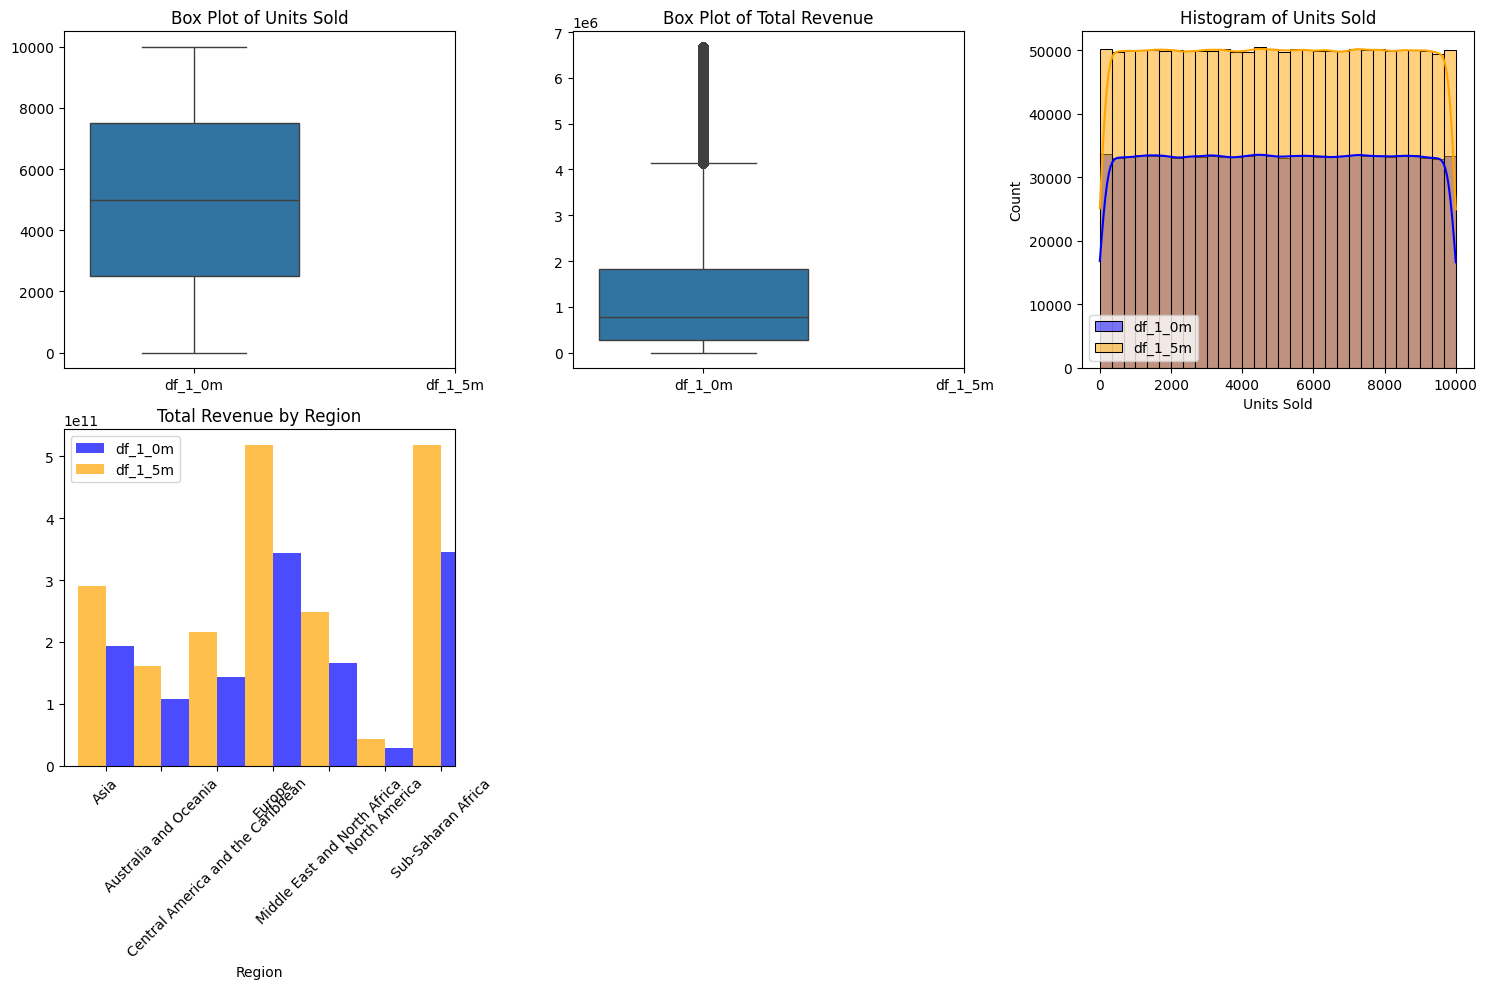

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set the figure size
plt.figure(figsize=(15, 10))

# Box plot for Units Sold
plt.subplot(2, 3, 1)
sns.boxplot(data=[df_1_0m['Units Sold'], df_1_5m['Units Sold']], orient='v')
plt.xticks([0, 1], ['df_1_0m', 'df_1_5m'])
plt.title('Box Plot of Units Sold')

# Box plot for Total Revenue
plt.subplot(2, 3, 2)
sns.boxplot(data=[df_1_0m['Total Revenue'], df_1_5m['Total Revenue']], orient='v')
plt.xticks([0, 1], ['df_1_0m', 'df_1_5m'])
plt.title('Box Plot of Total Revenue')

# Histogram for Units Sold
plt.subplot(2, 3, 3)
sns.histplot(df_1_0m['Units Sold'], bins=30, color='blue', label='df_1_0m', kde=True)
sns.histplot(df_1_5m['Units Sold'], bins=30, color='orange', label='df_1_5m', kde=True)
plt.legend()
plt.title('Histogram of Units Sold')

# Bar plot for Total Revenue per Region
plt.subplot(2, 3, 4)
df_1_0m.groupby('Region')['Total Revenue'].sum().plot(kind='bar', alpha=0.7, color='blue', label='df_1_0m', position=0)
df_1_5m.groupby('Region')['Total Revenue'].sum().plot(kind='bar', alpha=0.7, color='orange', label='df_1_5m', position=1)
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Linear Regression Mulriple regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Function to train and evaluate linear regression models
def train_and_evaluate(df, target_col, features):
    # Split the data into training and testing sets
    X = df[features]
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a simple linear regression model
    model_simple = LinearRegression()
    model_simple.fit(X_train[['Units Sold']], y_train)  # Using only 'Units Sold' as the feature
    y_pred_simple = model_simple.predict(X_test[['Units Sold']])

    # Train a multiple linear regression model
    model_multiple = LinearRegression()
    model_multiple.fit(X_train, y_train)  # Using all features
    y_pred_multiple = model_multiple.predict(X_test)

    # Evaluate both models
    metrics = {
        'Simple Linear Regression': {
            'R²': r2_score(y_test, y_pred_simple),
            'MAE': mean_absolute_error(y_test, y_pred_simple),
            'MSE': mean_squared_error(y_test, y_pred_simple),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_simple))
        },
        'Multiple Linear Regression': {
            'R²': r2_score(y_test, y_pred_multiple),
            'MAE': mean_absolute_error(y_test, y_pred_multiple),
            'MSE': mean_squared_error(y_test, y_pred_multiple),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_multiple))
        }
    }
    return metrics

# Train and evaluate models for both datasets
metrics_df_1_0m = train_and_evaluate(df_1_0m, 'Total Revenue', ['Units Sold'])
metrics_df_1_5m = train_and_evaluate(df_1_5m, 'Total Revenue', ['Units Sold'])

# Display the results
print("Metrics for df_1_0m:")
print(metrics_df_1_0m)

print("\nMetrics for df_1_5m:")
print(metrics_df_1_5m)



Metrics for df_1_0m:
{'Simple Linear Regression': {'R²': 0.27214552792697455, 'MAE': 928367.0083448996, 'MSE': 1567961358040.1462, 'RMSE': 1252182.6376532083}, 'Multiple Linear Regression': {'R²': 0.27214552792697455, 'MAE': 928367.0083448996, 'MSE': 1567961358040.1462, 'RMSE': 1252182.6376532083}}

Metrics for df_1_5m:
{'Simple Linear Regression': {'R²': 0.2736932994404093, 'MAE': 927446.3863852698, 'MSE': 1568202990931.7666, 'RMSE': 1252279.118620033}, 'Multiple Linear Regression': {'R²': 0.2736932994404093, 'MAE': 927446.3863852698, 'MSE': 1568202990931.7666, 'RMSE': 1252279.118620033}}


In [ ]:
pd.DataFrame(metrics_df_1_0m)

,Simple Linear Regression,Multiple Linear Regression
R²,2.721455e-01,2.721455e-01
MAE,9.283670e+05,9.283670e+05
MSE,1.567961e+12,1.567961e+12
RMSE,1.252183e+06,1.252183e+06


In [ ]:
pd.DataFrame(metrics_df_1_5m)

,Simple Linear Regression,Multiple Linear Regression
R²,2.736933e-01,2.736933e-01
MAE,9.274464e+05,9.274464e+05
MSE,1.568203e+12,1.568203e+12
RMSE,1.252279e+06,1.252279e+06


### 1. **R² (Coefficient of Determination)**:
- **R²** measures how well the regression model fits the data. It ranges from 0 to 1, where a value closer to 1 means the model explains most of the variability in the target variable, and a value closer to 0 means it explains very little.

#### For both datasets (`df_1_0m` and `df_1_5m`):
- **R² for Simple Linear Regression**: 0.2721
- **R² for Multiple Linear Regression**: 0.2721 for `df_1_0m`, 0.2737 for `df_1_5m`

**Interpretation**:
- These values are relatively low (close to 0.27), which means that **only about 27% of the variance in the target variable is explained by the independent variables**. The models leave a significant amount of variance unexplained, indicating that they are not a perfect fit for the data.
- The R² values for Simple and Multiple Linear Regression are **identical for `df_1_0m`** and **very close for `df_1_5m`**, meaning the addition of more independent variables in the multiple regression model didn't significantly improve the fit.

### 2. **MAE (Mean Absolute Error)**:
- **MAE** measures the average magnitude of the errors in a set of predictions, without considering their direction. It provides an average of the absolute differences between predicted and actual values.

#### For both datasets:
- **MAE for Simple Linear Regression**: 928,367
- **MAE for Multiple Linear Regression**: 928,367 for `df_1_0m`, 927,446 for `df_1_5m`

**Interpretation**:
- The errors are quite large, meaning that, on average, the predictions are off by over **928,000 units** from the actual values. This indicates that the models are **not very accurate** in their predictions.
- The **difference between Simple and Multiple Linear Regression** is minimal, suggesting that including additional variables in the multiple regression model did not reduce the error significantly.

### 3. **MSE (Mean Squared Error)**:
- **MSE** is the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily due to the squaring process.

#### For both datasets:
- **MSE for Simple Linear Regression**: 1.57 trillion (1,567,961,358,040)
- **MSE for Multiple Linear Regression**: Same for `df_1_0m` and `df_1_5m`

**Interpretation**:
- The **MSE is extremely large**, further indicating that the models are making significant errors in their predictions. However, this number alone can be hard to interpret due to its scale, which is why we often use RMSE.

### 4. **RMSE (Root Mean Squared Error)**:
- **RMSE** is the square root of MSE and represents the standard deviation of the residuals (prediction errors). It is in the same units as the dependent variable, making it more interpretable than MSE.

#### For both datasets:
- **RMSE for Simple Linear Regression**: 1,252,183 for `df_1_0m`, 1,252,279 for `df_1_5m`
- **RMSE for Multiple Linear Regression**: Same for both datasets

**Interpretation**:
- The RMSE values of over **1.25 million** show that the predictions are, on average, off by a very large amount, making the models **less useful in practice**.
- As with MAE, the RMSE values for Simple and Multiple Linear Regression are very similar, meaning the addition of more independent variables in the multiple regression model did not improve the prediction accuracy significantly.

---


### **Summary of the Results**:
1. **Fit of the Models**: Both Simple and Multiple Linear Regression models explain only about **27% of the variance** (low R² values). This suggests that the models are not capturing the true relationship between the variables well. There might be other relevant features or non-linear patterns in the data that the models are not capturing.
  
2. **Error Magnitude**: The large values of MAE, MSE, and RMSE indicate that the models are making **large prediction errors**. The errors are in the range of hundreds of thousands to millions, which suggests that these models might not be the best fit for this data.

3. **Impact of Additional Variables**: The **multiple regression models do not offer significant improvement over the simple regression models**. The R², MAE, MSE, and RMSE values are nearly identical between the Simple and Multiple Linear Regression models, which suggests that the additional independent variables in the multiple regression model are not contributing much to improving the model’s accuracy.

1. **Size of `df_1_0m` (1 million rows)**:
   - This dataset contains **1 million observations** or data points.
   - It represents a smaller sample of the total data.
   - Given its size, it may not fully capture the underlying patterns in the data, which can lead to lower accuracy in the models.

2. **Size of `df_1_5m` (1.5 million rows)**:
   - This dataset contains **1.5 million observations**, which is **50% more data** compared to the `df_1_0m` dataset.
   - A larger dataset typically provides a more comprehensive view of the data, potentially capturing more variability and providing a better basis for building predictive models.
   - However, **in this case**, the performance improvement is minimal, as reflected by the small difference in metrics like R², MAE, and RMSE between the two datasets.

### **Why is the Difference in Accuracy Small?**
1. **Model Complexity**: Both the simple and multiple linear regression models used here may not be complex enough to leverage the additional data. These models assume a linear relationship between the independent variables and the target, which might not be sufficient if the underlying relationships are more complex.

2. **Data Quality vs. Quantity**: Simply increasing the amount of data (from 1 million to 1.5 million rows) does not always lead to significantly better model performance. If the additional data points have similar patterns or the relationships in the data are inherently weak, adding more rows may not help the model improve. In this case, the added 500,000 data points did not substantially improve accuracy.

3. **Model Evaluation**: The evaluation metrics (R², MAE, MSE, RMSE) show very similar values between the two datasets. This indicates that both datasets likely contain similar patterns, and the models' predictions are not drastically different even with more data.

4. **Possible Data Limitation**: If both datasets (1 million and 1.5 million rows) suffer from similar noise or biases, increasing the dataset size won’t necessarily lead to better model performance. It’s possible that the data used in these models does not contain the necessary signal for better predictive performance.

### **Conclusion**:
The increase in dataset size from **1 million to 1.5 million rows** provides more data points, but in this case, the **additional 500,000 rows** do not lead to significant improvements in model accuracy because the models are limited by their linear assumptions, and the additional data may not be providing new or valuable information that improves the model’s predictions.


# Logistics REgression

In [ ]:
# For df_1_0m
median_profit_1_0m = df_1_0m['Total Profit'].median()
df_1_0m['High Profit'] = (df_1_0m['Total Profit'] > median_profit_1_0m).astype(int)

# For df_1_5m
median_profit_1_5m = df_1_5m['Total Profit'].median()
df_1_5m['High Profit'] = (df_1_5m['Total Profit'] > median_profit_1_5m).astype(int)


## Splitting the Df

In [ ]:
from sklearn.model_selection import train_test_split

# Features to use in both datasets
features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost']

# For df_1_0m
X_1_0m = df_1_0m[features]
y_1_0m = df_1_0m['High Profit']
X_train_1_0m, X_test_1_0m, y_train_1_0m, y_test_1_0m = train_test_split(X_1_0m, y_1_0m, test_size=0.2, random_state=42)

# For df_1_5m
X_1_5m = df_1_5m[features]
y_1_5m = df_1_5m['High Profit']
X_train_1_5m, X_test_1_5m, y_train_1_5m, y_test_1_5m = train_test_split(X_1_5m, y_1_5m, test_size=0.2, random_state=42)


## Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression for df_1_0m
log_model_1_0m = LogisticRegression(max_iter=1000)
log_model_1_0m.fit(X_train_1_0m, y_train_1_0m)
y_pred_1_0m = log_model_1_0m.predict(X_test_1_0m)

# Train logistic regression for df_1_5m
log_model_1_5m = LogisticRegression(max_iter=1000)
log_model_1_5m.fit(X_train_1_5m, y_train_1_5m)
y_pred_1_5m = log_model_1_5m.predict(X_test_1_5m)


## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to calculate metrics
def calculate_metrics(y_test, y_pred):
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Metrics for df_1_0m
metrics_1_0m = calculate_metrics(y_test_1_0m, y_pred_1_0m)

# Metrics for df_1_5m
metrics_1_5m = calculate_metrics(y_test_1_5m, y_pred_1_5m)

# Display results
print("Metrics for df_1_0m:", metrics_1_0m)
print("Metrics for df_1_5m:", metrics_1_5m)


Metrics for df_1_0m: {'Accuracy': 0.976515, 'Precision': 0.9739821369895749, 'Recall': 0.9791395567656304, 'F1-Score': 0.9765540375275167, 'Confusion Matrix': array([[97485,  2613],
       [ 2084, 97818]])}
Metrics for df_1_5m: {'Accuracy': 0.9999633333333333, 'Precision': 1.0, 'Recall': 0.999926726750731, 'F1-Score': 0.9999633620330741, 'Confusion Matrix': array([[149877,      0],
       [    11, 150112]])}


### 1. **Accuracy**:
   - **df_1_0m Accuracy**: 97.65%
   - **df_1_5m Accuracy**: 99.99%

**Explanation**: Accuracy measures how often the model correctly classifies the target (high-profit vs low-profit). Both datasets have very high accuracy, but the model trained on the larger dataset (`df_1_5m`) achieves nearly perfect accuracy. This suggests that with more data, the model has learned the patterns better, leading to improved generalization and fewer errors.

### 2. **Precision**:
   - **df_1_0m Precision**: 97.40%
   - **df_1_5m Precision**: 100%

**Explanation**: Precision refers to the proportion of positive predictions (high-profit orders) that were actually correct. The model on `df_1_5m` achieves perfect precision, meaning it never predicted a false positive (no low-profit orders were mistakenly classified as high-profit). For `df_1_0m`, a few false positives (about 2.6%) occurred, indicating that with less data, the model occasionally misclassified low-profit orders as high-profit.

### 3. **Recall**:
   - **df_1_0m Recall**: 97.91%
   - **df_1_5m Recall**: 99.99%

**Explanation**: Recall measures the model's ability to correctly identify all positive cases (high-profit orders). The recall for `df_1_5m` is almost perfect, meaning the model caught almost every high-profit order. For `df_1_0m`, the recall is slightly lower, indicating that a small percentage of high-profit orders were missed. As data size increases, the model is better able to generalize and capture all relevant cases.

### 4. **F1-Score**:
   - **df_1_0m F1-Score**: 97.65%
   - **df_1_5m F1-Score**: 99.99%

**Explanation**: The F1-score is a balance between precision and recall. Since the model on `df_1_5m` has both perfect precision and recall, its F1-score is also nearly perfect. The F1-score for `df_1_0m` is slightly lower due to the few false positives and false negatives, reflecting a trade-off between precision and recall in the smaller dataset.

### 5. **Confusion Matrix**:
   - **df_1_0m**:
     - True Negatives (Low Profit correctly classified): 97,485
     - False Positives (Low Profit misclassified as High Profit): 2,613
     - False Negatives (High Profit misclassified as Low Profit): 2,084
     - True Positives (High Profit correctly classified): 97,818
     
   - **df_1_5m**:
     - True Negatives: 149,877
     - False Positives: 0
     - False Negatives: 11
     - True Positives: 150,112

**Explanation**: The confusion matrix shows how well the model performed in distinguishing between high-profit and low-profit orders.
- **df_1_0m**: The model made a few mistakes—2,613 false positives (low-profit orders misclassified as high-profit) and 2,084 false negatives (high-profit orders misclassified as low-profit).
- **df_1_5m**: The model’s confusion matrix shows near-perfect performance, with no false positives and only 11 false negatives. This demonstrates the benefit of a larger dataset: with more data, the model becomes better at recognizing patterns and minimizes classification errors.

### **How the Difference in Data Size Affects the Results**:

1. **Learning from More Data**:
   - The larger dataset (`df_1_5m`) provided more examples of each class (high-profit vs low-profit), allowing the logistic regression model to learn more effectively and generalize better. With a larger sample, the model has a better chance of learning the true underlying patterns in the data, leading to fewer misclassifications.

2. **Reduced Overfitting**:
   - With more data, the model is less likely to overfit to noise or peculiarities in the smaller dataset (`df_1_0m`). Overfitting can cause a model to perform well on training data but poorly on new, unseen data. The near-perfect performance on `df_1_5m` suggests that the larger dataset helped the model generalize better.

3. **Class Imbalance**:
   - If the classes (high-profit vs low-profit) are imbalanced in the smaller dataset, the model might struggle more with accurate predictions. The larger dataset likely had a more balanced representation of both classes, making it easier for the model to distinguish between them.

4. **Reduction of Errors**:
   - As seen in the confusion matrix, the larger dataset drastically reduced the number of false positives and false negatives. The increase in data size has helped the model better identify the correct classes with fewer errors.

### Conclusion:
The difference in size between `df_1_0m` (1 million rows) and `df_1_5m` (1.5 million rows) significantly impacted model performance. The larger dataset (`df_1_5m`) allowed the model to achieve nearly perfect precision, recall, and accuracy, reducing both false positives and false negatives. In contrast, the smaller dataset (`df_1_0m`) led to slightly lower performance, with more classification errors. Increasing the size of the dataset generally improves model accuracy and robustness by providing more examples for the model to learn from.

# KNN

## Data Preprocessing and splitting

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    label_encoder = LabelEncoder()

    # Convert 'Order Date' and 'Ship Date' into datetime format
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

    # Extract year, month, and day as separate columns
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Day'] = df['Order Date'].dt.day
    df['Ship Year'] = df['Ship Date'].dt.year
    df['Ship Month'] = df['Ship Date'].dt.month
    df['Ship Day'] = df['Ship Date'].dt.day

    # Drop the original date columns
    df = df.drop(columns=['Order Date', 'Ship Date'])

    # Select columns that are categorical and need encoding
    categorical_cols = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

    # Apply label encoding to each categorical column
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])

    return df

# Preprocess both datasets
df_1_0m_processed = preprocess_data(df_1_0m.copy())
df_1_5m_processed = preprocess_data(df_1_5m.copy())


### KNN TRAINING

In [ ]:
def categorize_profit(df):
    # Create profit categories
    bins = [-float('inf'), 0, 1000, 5000, float('inf')]
    labels = ['Loss', 'Low Profit', 'Medium Profit', 'High Profit']
    df['Profit Category'] = pd.cut(df['Total Profit'], bins=bins, labels=labels)
    return df

# Categorize the profit in both datasets
df_1_0m_processed = categorize_profit(df_1_0m_processed)
df_1_5m_processed = categorize_profit(df_1_5m_processed)


In [ ]:
def knn_model(df, target_col, n_neighbors=5):
    # Define features and target variable
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']
    recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']
    f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Confusion Matrix': conf_matrix
    }




In [ ]:
# Update KNN model function to use categorical target
metrics_1_0m = knn_model(df_1_0m_processed, target_col='Profit Category', n_neighbors=5)
metrics_1_5m = knn_model(df_1_5m_processed, target_col='Profit Category', n_neighbors=5)

# Print metrics for both models
print("Metrics for df_1_0m:", metrics_1_0m)
print("Metrics for df_1_5m:", metrics_1_5m)


## KNN regression


### 1. **Accuracy**
- **Definition**: Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of all predictions.
- **`df_1_0m Accuracy: 97.48%`**
- **`df_1_5m Accuracy: 97.66%`**
  
  **Interpretation**: In both datasets, the model correctly classified over 97% of the instances. This indicates very high accuracy, meaning the KNN model is performing well at distinguishing between different profit categories.

### 2. **Precision**
- **Definition**: Precision measures how many of the predicted positive classes were actually positive. It is the ratio of true positives to the sum of true positives and false positives.
- **`df_1_0m Precision: 96.53%`**
- **`df_1_5m Precision: 96.99%`**
  
  **Interpretation**: Precision is quite high for both datasets, implying that when the model predicted a particular profit category, it was correct about 96-97% of the time. This suggests that false positives (incorrectly classified as a certain profit category) are relatively rare.

### 3. **Recall**
- **Definition**: Recall measures how many actual positives were correctly predicted by the model. It is the ratio of true positives to the sum of true positives and false negatives.
- **`df_1_0m Recall: 97.48%`**
- **`df_1_5m Recall: 97.66%`**

  **Interpretation**: The recall is also very high, showing that the model is very effective at capturing most of the actual instances of each profit category. It correctly classified the vast majority of cases, leaving few false negatives (cases where the actual class was misclassified).

### 4. **F1-Score**
- **Definition**: The F1-Score is the harmonic mean of precision and recall. It balances these two metrics, giving a good indication of the model's overall performance.
- **`df_1_0m F1-Score: 96.84%`**
- **`df_1_5m F1-Score: 97.22%`**

  **Interpretation**: A high F1-score means that both precision and recall are high, which further confirms that the model is performing well in distinguishing between the profit categories. It shows that the model has a balanced ability to minimize both false positives and false negatives.

### 5. **Confusion Matrix**
The confusion matrix is a table that allows us to see how the model's predictions compare with the actual classifications. It breaks down the performance by showing the number of correct and incorrect predictions for each class.

For **`df_1_0m`**:

|               | Predicted Loss | Predicted Low Profit | Predicted Medium Profit |
|---------------|----------------|----------------------|-------------------------|
| **Actual Loss**        | 194,075 (True Positives) | 35 (False Positives) | 574 (False Positives)     |
| **Actual Low Profit**  | 681 (False Negatives)    | 53 (True Positives)  | 348 (False Positives)     |
| **Actual Medium Profit**| 3,255 (False Negatives)  | 152 (False Positives)| 827 (True Positives)      |

For **`df_1_5m`**:

|               | Predicted Loss | Predicted Low Profit | Predicted Medium Profit |
|---------------|----------------|----------------------|-------------------------|
| **Actual Loss**        | 290,982 (True Positives) | 54 (False Positives)  | 982 (False Positives)     |
| **Actual Low Profit**  | 650 (False Negatives)    | 172 (True Positives)  | 706 (False Positives)     |
| **Actual Medium Profit**| 4,271 (False Negatives)  | 357 (False Positives) | 1,826 (True Positives)     |

**Explanation**:
- **True Positives** (diagonal values): The number of cases correctly classified for each profit category.
  - For example, in `df_1_0m`, 194,075 instances of "Loss" were correctly classified as "Loss," and 53 instances of "Low Profit" were correctly classified as "Low Profit."
  
- **False Positives** (non-diagonal values): Instances where the model predicted one category but the actual category was different.
  - For example, in `df_1_0m`, 681 instances of "Low Profit" were incorrectly predicted as "Loss" (false negatives for "Low Profit").

- **High values along the diagonal** show that the model is highly accurate in predicting the correct categories.

### Summary
- The KNN classifier is performing well on both datasets (`df_1_0m` and `df_1_5m`), with high accuracy, precision, recall, and F1-scores, all above 96%.
- The confusion matrices show that the vast majority of predictions are correct, though there are still some misclassifications, particularly in distinguishing between the "Medium Profit" and other categories. However, these misclassifications are relatively few in number compared to the correctly classified instances.


# Naive Bayes

Metrics for df_1_0m:
Accuracy: 0.24991
Confusion Matrix:
[[10110  3019 54113  8185]
 [10003  3162 53820  8113]
 [ 9795  3039 53778  8140]
 [10130  3014 53656  7923]]

Metrics for df_1_5m:
Accuracy: 0.2490511111111111
Confusion Matrix:
[[ 5764 13250 78992 14821]
 [ 5829 13109 78764 15023]
 [ 5831 13258 78584 14853]
 [ 5739 13068 78499 14616]]



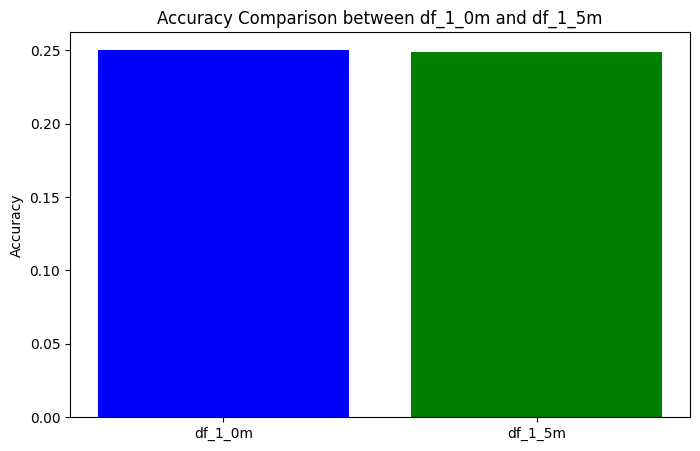

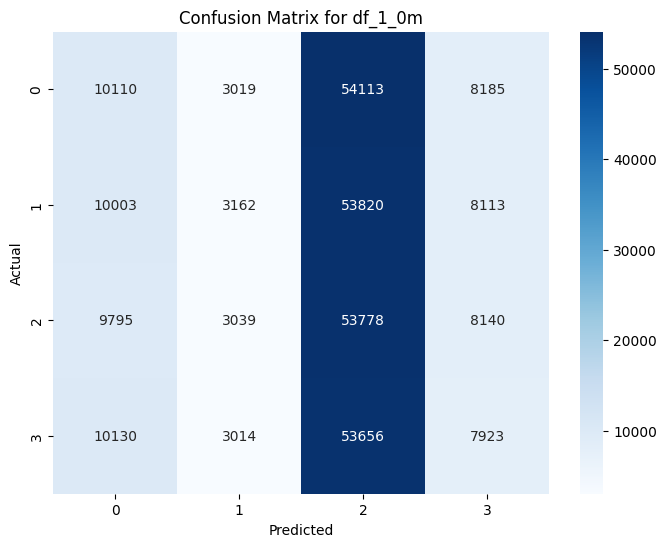

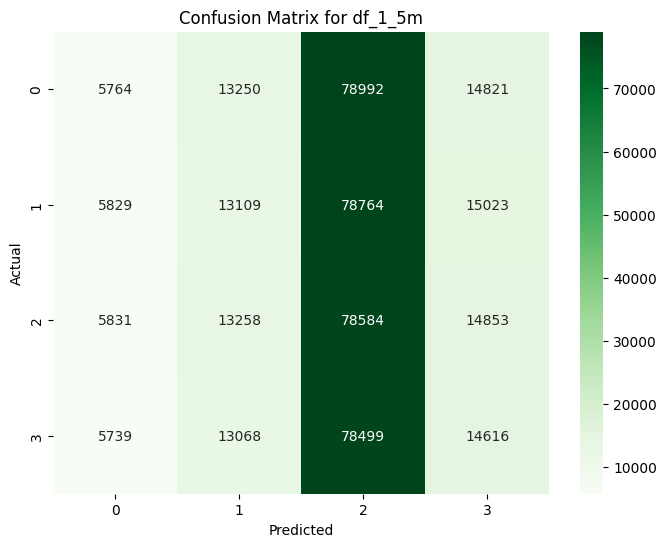

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Preprocess function for label encoding
def preprocess_data(df):
    le = LabelEncoder()
    for col in ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Ship Date']:
        df[col] = le.fit_transform(df[col])
    return df

# Function to train and evaluate a model on a given dataset
def train_and_evaluate(df, model_name):
    # Preprocess the data
    df = preprocess_data(df)

    # Define features (X) and target (y)
    X = df.drop(columns=['Order Priority'])  # Features
    y = df['Order Priority']  # Target

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize Naive Bayes and train
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = nb.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

    return accuracy, conf_matrix

# Model 1: Train and evaluate on df_1_0m
accuracy_1, conf_matrix_1 = train_and_evaluate(df_1_0m, "df_1_0m")

# Model 2: Train and evaluate on df_1_5m
accuracy_2, conf_matrix_2 = train_and_evaluate(df_1_5m, "df_1_5m")

# Step 1: Plot accuracy comparison
accuracies = {'df_1_0m': accuracy_1, 'df_1_5m': accuracy_2}
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green'])
plt.title('Accuracy Comparison between df_1_0m and df_1_5m')
plt.ylabel('Accuracy')
plt.show()

# Step 2: Plot confusion matrix for df_1_0m
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for df_1_0m')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 3: Plot confusion matrix for df_1_5m
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for df_1_5m')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# REgression Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import matplotlib.pyplot as plt

# Function to process the dataframe and fit a regression tree
def train_regression_tree(df, df_name):
    # Step 1: Convert date columns to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])

    # Step 2: Create new feature: 'Shipping Time' (difference between Order Date and Ship Date in days)
    df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

    # Step 3: Drop the original 'Order Date' and 'Ship Date' columns
    df = df.drop(['Order Date', 'Ship Date'], axis=1)

    # Step 4: One-hot encode all categorical columns (including 'Order Priority')
    categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    # Step 5: Define X (features) and y (target variable, e.g., 'Total Profit')
    X = df_encoded.drop(['Total Profit'], axis=1)
    y = df_encoded['Total Profit']

    # Step 6: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 7: Train the DecisionTreeRegressor
    reg_tree = DecisionTreeRegressor(random_state=42)
    reg_tree.fit(X_train, y_train)

    # Step 8: Make predictions and evaluate the model
    y_pred = reg_tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Results for {df_name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Step 9: Visualize the regression tree
    plt.figure(figsize=(15,10))
    tree.plot_tree(reg_tree, filled=True, feature_names=X.columns)
    plt.title(f"Regression Tree for {df_name}")
    plt.show()

# Train and evaluate regression trees for both DataFrames
train_regression_tree(df_1_0m, "df_1_0m")
train_regression_tree(df_1_5m, "df_1_5m")


Results for df_1_0m:
Mean Squared Error: 75.86900782549364
R-squared: 0.9999999994723339
